In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

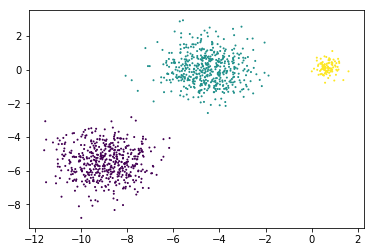

In [2]:
from sklearn.datasets import make_blobs

nb_samples = 1500
random_state = 170
X1, y1 = make_blobs(n_samples=nb_samples, random_state=random_state)

X1 = X1[y1!=2]
y1 = y1[y1!=2]

X2, y2 = make_blobs(n_samples=nb_samples, random_state=random_state)
X2 = X2/3.

X2 = X2[y2==2][:100]
y2 = y2[y2==2][:100]

X = np.concatenate([X1,X2], 0)
y = np.hstack([y1,y2])

nb_samples = X.shape[0]

plt.scatter(X[:,0],X[:,1], c=y, s=1)

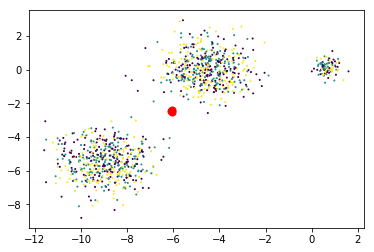

In [3]:
nb_cluster = 3

# 初期クラスタの割り当て
cluster_idx = np.random.randint(0,nb_cluster, (nb_samples))
assignment = np.eye(nb_cluster)[cluster_idx].astype(np.int32)

# 初期クラスタ中心
cluster_center = np.matmul(assignment.transpose(1,0),X) / np.expand_dims(assignment.sum(0),1)

plt.scatter(X[:,0],X[:,1], c=cluster_idx, s=1)
plt.scatter(cluster_center[:,0],cluster_center[:,1], c='r', s=50)

In [4]:
for step in range(5):
    plt.figure(figsize=(10,10))
    plt.scatter(X[:,0],X[:,1], c=cluster_idx, s=1)
    plt.scatter(cluster_center[:,0],cluster_center[:,1], c='r', s=50)
#    plt.savefig('kmeans.'+str(step).zfill(4)+'.png', bbox_inches='tight', transparent=True)
    plt.savefig('kmeans.c3.var.'+str(step).zfill(4)+'.a.png', bbox_inches='tight', transparent=False)
    plt.close()
    
    # クラスタ中心の計算
    cluster_center = np.matmul(assignment.transpose(1,0),X) / np.expand_dims(assignment.sum(0),1)

    plt.figure(figsize=(10,10))
    plt.scatter(X[:,0],X[:,1], c=cluster_idx, s=1)
    plt.scatter(cluster_center[:,0],cluster_center[:,1], c='r', s=50)
#    plt.savefig('kmeans.'+str(step).zfill(4)+'.png', bbox_inches='tight', transparent=True)
    plt.savefig('kmeans.c3.var.'+str(step).zfill(4)+'.b.png', bbox_inches='tight', transparent=False)
    plt.close()
    
    # クラスタの再割り当て
    cluster_idx = np.square(np.expand_dims(X,1)-np.expand_dims(cluster_center,0)).sum(2).argmin(1)
    assignment = np.eye(nb_cluster)[cluster_idx].astype(np.int32)

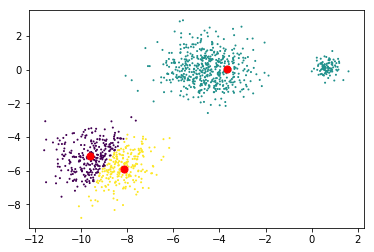

In [5]:
plt.scatter(X[:,0],X[:,1], c=cluster_idx, s=1)
plt.scatter(cluster_center[:,0],cluster_center[:,1], c='r', s=50)